In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.special as sp
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

### Armónicos esféricos


In [2]:
def SphericalHarmonics (l:int,m:int):

    """
    Parameters:
    - l:int -> quantum azimuthal number
    - m:int -> quantum magnetic number
    """

    # Grids of angles     
    theta = np.linspace(0,np.pi,100)
    phi = np.linspace(0,2*np.pi, 100)

    #Create meshgrid (theta-phi)
    theta, phi = np.meshgrid(theta, phi)

    # Calculate the Cartesian coordinates of each point in the mesh.
    xyz = np.array([np.sin(theta) * np.sin(phi), np.sin(theta) * np.cos(phi),    np.cos(theta)])

    #Harmonic calculation 
    Y = sp.sph_harm(m,l,phi,theta)
    
    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1) ** m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1) ** m * Y.real
    
    # Y in in cartesian coordinates 
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colur the plotted surface 
    cmap = plt.cm.ScalarMappable(cmap=cm.jet)
    cmap.set_clim(-0.5, 0.5)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(projection='3d')

    ax.plot_surface(Yx,Yy,Yz, facecolors = cmap.to_rgba(Y.real),rstride = 1, cstride = 1)
    m = cm.ScalarMappable(cmap=cm.jet)
    m.set_array(Y)
    fig.colorbar(m, shrink=0.9)
    
    ax.set_xlabel('X', fontsize = 16)
    ax.set_ylabel('Y', fontsize = 16)
    ax.set_zlabel('Z', fontsize = 16)
    
    plt.show()

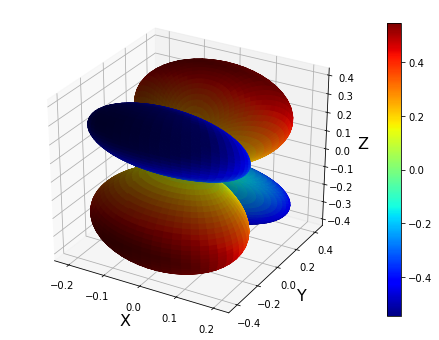

array([[ 0.        ,  0.03464685,  0.06915419, ..., -0.06915419,
        -0.03464685, -0.        ],
       [ 0.        ,  0.0345771 ,  0.06901496, ..., -0.06901496,
        -0.0345771 , -0.        ],
       [ 0.        ,  0.03436811,  0.06859783, ..., -0.06859783,
        -0.03436811, -0.        ],
       ...,
       [-0.        ,  0.03436811,  0.06859783, ..., -0.06859783,
        -0.03436811, -0.        ],
       [-0.        ,  0.0345771 ,  0.06901496, ..., -0.06901496,
        -0.0345771 , -0.        ],
       [-0.        ,  0.03464685,  0.06915419, ..., -0.06915419,
        -0.03464685, -0.        ]])

In [3]:
SphericalHarmonics(2,1)
